# Day 1 - Basic of Scikit - Learn

**About Scikit-Learn**

<b>Scikit-Learn</b> is one of the most popular open-source machine learning libraries for Python. It provides simple and efficient tools for data mining and data analysis, built on top of NumPy, SciPy, and Matplotlib.

Key Features:
- <b>Wide Range of Algorithms:</b> Classification, regression, clustering, dimensionality reduction, and more.
- <b>Consistent API:</b> Makes it easy to switch between different models.
- <b>Integration with Other Libraries:</b> Works seamlessly with pandas, NumPy, and Matplotlib.
- <b>Extensive Documentation:</b>Comprehensive guides and examples to help you get started.


In [1]:
# Installing Scikit-Learn
# !pip install scikit-learn

In [2]:
import warnings as wr 
wr.filterwarnings('ignore')

**Handling Missing Values**

In [3]:
# Missing values can adversely affect model performance. Scikit-Learn provides tools to handle them.
from sklearn.impute import SimpleImputer
import pandas as pd

# Sample DataFrame
data = {
    'Age':[25, None, 30, 40],
    'Salary': [25000, 60000, None, 80000]
}

df = pd.DataFrame(data)

# Impute missing values with mean
imputer = SimpleImputer(strategy='mean')
df[['Age','Salary']] = imputer.fit_transform(df[['Age','Salary']]) # impute & store in same var
print(df)

         Age   Salary
0  25.000000  25000.0
1  31.666667  60000.0
2  30.000000  55000.0
3  40.000000  80000.0


## Encoding Categorical Variables

**Machine learning models require numerical input. Convert categorical variables using encoding techniques.**

In [4]:
# Full code
from sklearn.preprocessing import OneHotEncoder

# Sample DataFrame
data = {
    'City':['New York','Loss Angles','Chicago','New York']
}

df = pd.DataFrame(data)

# One-Hot Encoding
encoder = OneHotEncoder(sparse=False)
encoded = encoder.fit_transform(df[['City']])
encoded_df = pd.DataFrame(encoded, columns=encoder.get_feature_names_out(['City']))
df = pd.concat([df, encoded_df], axis=1)
print(df)

          City  City_Chicago  City_Loss Angles  City_New York
0     New York           0.0               0.0            1.0
1  Loss Angles           0.0               1.0            0.0
2      Chicago           1.0               0.0            0.0
3     New York           0.0               0.0            1.0


#### Explanation

The `fit_transform` method first learns the unique values from the 'City' column of your DataFrame, then encodes these as one-hot vectors.

`df[['City']]` selects the 'City' column from your DataFrame and ensures it's passed in the correct format (as a DataFrame).

`encoder.get_feature_names_out(['City'])` generates the column names for the new DataFrame, which are the one-hot encoded categories

The `get_feature_names_out` method in OneHotEncoder is used to retrieve the names of all the features `after encoding`. This method returns an `array of feature names`, allowing you to know which columns correspond to which category after the encoding process.

The `get_feature_names_out(['City'])` function call would return an array of names for the one-hot encoded features of the 'City' column. Each feature name includes the original column name (in this case, 'City') followed by the category value.

For instance, if your 'City' column had values ['Tokyo', 'New York', 'Dhaka'], after one-hot encoding, the feature names might be something like: `['City_Tokyo', 'City_New York', 'City_Dhaka']`.

•  Sparse Matrix: This is a matrix in which most of the elements are zero. Using a sparse matrix can save memory when dealing with large datasets with many zero entries.

•  Dense Array: This is a regular NumPy array where all elements are stored, including zeros. This can be easier to work with for certain operations but may use more memory.

* When you set sparse=False, the OneHotEncoder will return a dense array, which can be more convenient for some applications, especially if the dataset is not too large and memory usage is not a concer


In [5]:
import os
# Get the current working directory
current_path = os.getcwd()

# Print the current path
print("Current Working Directory:", current_path)


Current Working Directory: e:\M60\coding\Scikit_learn\ScikitLearn90Days


In [6]:
# cat ending
data = {
    'City':['New York','Los Angles','Chicago','New York']
}
df = pd.DataFrame(data)
df

,City
0,New York
1,Los Angles
2,Chicago
3,New York


In [7]:
# Full code
encoder = OneHotEncoder(sparse=False)
encoded = encoder.fit_transform(df[['City']]) # step 1
encoded_df = pd.DataFrame(encoded, columns=encoder.get_feature_names_out(['City'])) # step 2
df = pd.concat([df, encoded_df], axis=1)  # step 3
print(df) 


         City  City_Chicago  City_Los Angles  City_New York
0    New York           0.0              0.0            1.0
1  Los Angles           0.0              1.0            0.0
2     Chicago           1.0              0.0            0.0
3    New York           0.0              0.0            1.0


In [8]:
encoder = OneHotEncoder(sparse=False)
encoded = encoder.fit_transform(df[['City']])
encoded

array([[0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.]])

In [9]:
encoded_df = pd.DataFrame(encoded, columns=encoder.get_feature_names_out(['City']))
encoded_df 

,City_Chicago,City_Los Angles,City_New York
0,0.0,0.0,1.0
1,0.0,1.0,0.0
2,1.0,0.0,0.0
3,0.0,0.0,1.0


In [10]:
df = pd.concat([df, encoded_df], axis=1) # step 3 (concat within array)
df

,City,City_Chicago,City_Los Angles,City_New York,City_Chicago,City_Los Angles,City_New York
0,New York,0.0,0.0,1.0,0.0,0.0,1.0
1,Los Angles,0.0,1.0,0.0,0.0,1.0,0.0
2,Chicago,1.0,0.0,0.0,1.0,0.0,0.0
3,New York,0.0,0.0,1.0,0.0,0.0,1.0


# Feature Scaling 

- Scaling features ensures that all variables contribute equally to the result
- The meaning of STANDARDIZE is to bring into conformity with a standard especially in order to assure consistency and regularity

Standardization, also known as `Z-score normalization`, is a process used in data preprocessing to transform features so that they have the properties of a standard normal distribution with a `mean of 0` and a `standard deviation of 1`.

**Why Standardization**

- Improved Performance: Many machine learning algorithms perform better when the input features have a similar scale.
- Equal Weight: Helps in ensuring that all features contribute equally to the result.
- Gradient Descent: In algorithms like gradient descent, standardization can help in faster convergence.

In [11]:
# Sample DataFrame - height & weight two range are different
data = {
    'height':[150 ,160 , 165, 170, 180],
    'weight':[50, 60, 70, 80, 90]
}
df = pd.DataFrame(data)
df

,height,weight
0,150,50
1,160,60
2,165,70
3,170,80
4,180,90


In [12]:
# Standardization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# scall two col
df[['height_scaled','weight_scaled']] = scaler.fit_transform(df[['height','weight']])
print(df)

   height  weight  height_scaled  weight_scaled
0     150      50           -1.5      -1.414214
1     160      60           -0.5      -0.707107
2     165      70            0.0       0.000000
3     170      80            0.5       0.707107
4     180      90            1.5       1.414214


In [13]:
# Example 2
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Sample data
data = {'height': [150, 160, 170, 180, 190]}
df = pd.DataFrame(data)

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the data
standardized_data = scaler.fit_transform(df[['height']])

# Add the standardized values to the DataFrame
df['standardized_height'] = standardized_data

print(df)


   height  standardized_height
0     150            -1.414214
1     160            -0.707107
2     170             0.000000
3     180             0.707107
4     190             1.414214


# 6. Building Your First Model

### Loading a Dataset

In [14]:
import pandas as pd 
from sklearn.datasets import load_iris

# load iris dataset
iris = load_iris() # it will load col values

X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.Series(iris.target, name='Species')

print(X.head())
print(y.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2
0    0
1    0
2    0
3    0
4    0
Name: Species, dtype: int32


**Splitting the Data**

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20, random_state=42)

In [16]:
print("Train Size :", X_train.shape)
print("Test Size :", X_test.shape)

Train Size : (120, 4)
Test Size : (30, 4)


**Training a Simple Classifier**

We'll use a Logistic Regression classifier.

In [17]:
from sklearn.linear_model import LogisticRegression
# Model Initialization
model = LogisticRegression(max_iter=200)

# Train the model
model.fit(X_train, y_train)

LogisticRegression(max_iter=200)

**Making Predictions**

In [18]:
# Make predictions
predictions = model.predict(X_test)
predictions

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

# 7. Model Evaluation Metrics

Evaluate the performance of your model using various metrics.

**Accuracy**

Measures the proportion of correct predictions.

In [19]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy * 100:.2f}%")


Accuracy: 100.00%


**Precision, Recall, and F1-Score**

Provide more insight into model performance, especially for imbalanced datasets.

In [20]:
from sklearn.metrics import classification_report
report = classification_report(y_test, predictions, target_names=iris.target_names)
print(report)

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



**Confusion Matrix**

Visualizes the performance of a classification model.



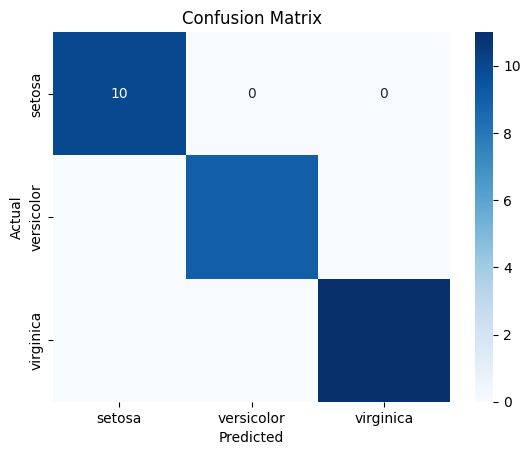

In [21]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt 

cm = confusion_matrix(y_test, predictions)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, 
            yticklabels=iris.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# 8 Example Project: Iris Classification

#### Project Overview

**Objective:** Develop a machine learning pipeline to classify Iris species based on flower measurements.

**Tools:** Python, Scikit-Learn, pandas, Matplotlib, Seaborn

### Step-by-Step Guide

## 8.1 Load and Explore the Dataset

In [39]:
import pandas as pd 
import seaborn as  sns 
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.datasets import load_iris

# Load Iris dataset
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.Series(iris.target, name='Species')

# Combine Dataset
df =  pd.concat([X, y], axis=1)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


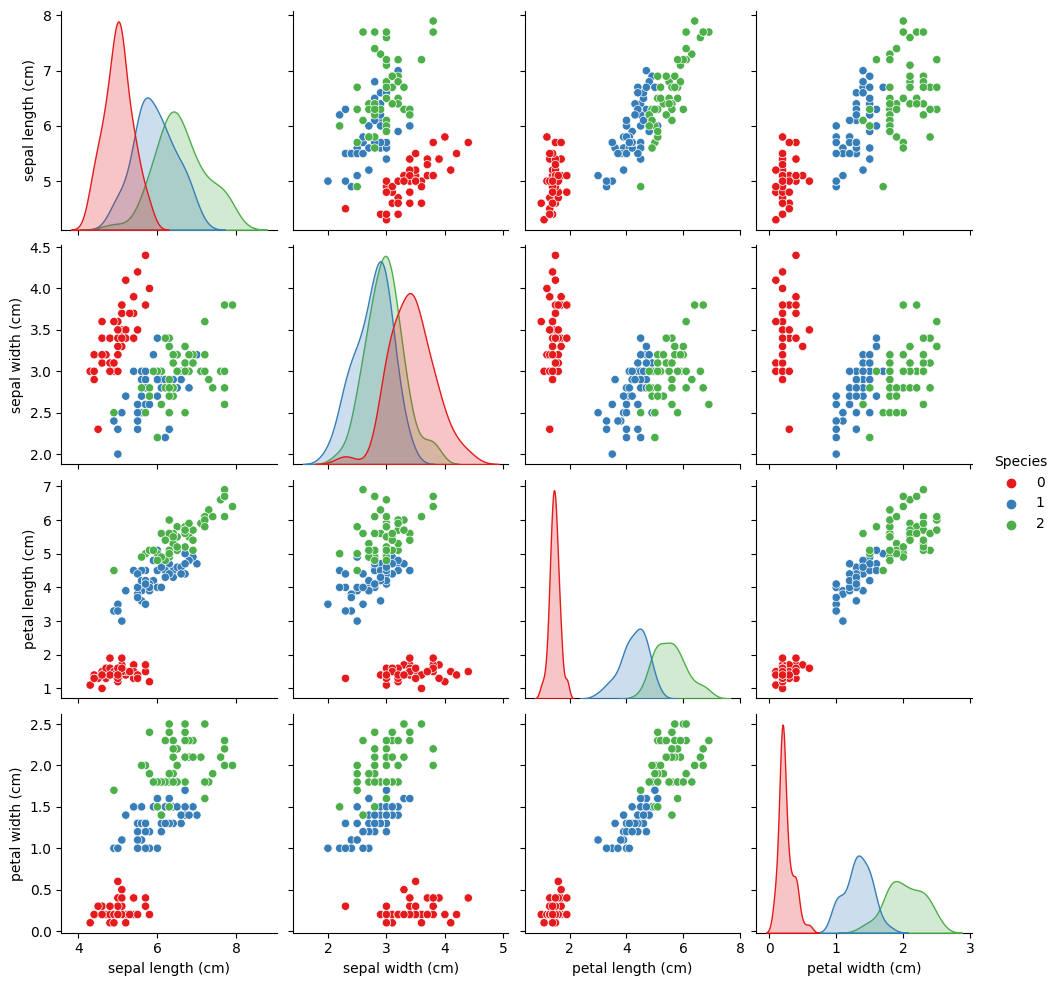

In [26]:
# Visualize pairplot
sns.pairplot(df, hue='Species', palette='Set1')
plt.show()

## 8.2. Data Preprocessing

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   Species            150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


In [29]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [30]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [31]:
# Split the Data (X, y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

In [32]:
# Feature Scaling
X_trained_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [43]:
X_trained_scaled[:5]

array([[-1.47393679,  1.20365799, -1.56253475, -1.31260282],
       [-0.13307079,  2.99237573, -1.27600637, -1.04563275],
       [ 1.08589829,  0.08570939,  0.38585821,  0.28921757],
       [-1.23014297,  0.75647855, -1.2187007 , -1.31260282],
       [-1.7177306 ,  0.30929911, -1.39061772, -1.31260282]])

## 8.3 Building and Training the Model

In [45]:
from sklearn.linear_model import LogisticRegression


# Initialize the model
model = LogisticRegression(max_iter=200)
model.fit(X_trained_scaled, y_train)

LogisticRegression(max_iter=200)

## 8.4 Making Predictions and Evaluating the Model

In [46]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns 
import matplotlib.pyplot as plt

# Prediction
predictions = model.predict(X_test_scaled)

# Evaluation
print("Classfication Report :")
print(classification_report(y_test, predictions, target_names=iris.target_names))

Classfication Report :
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.90      1.00      0.95         9
   virginica       1.00      0.91      0.95        11

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



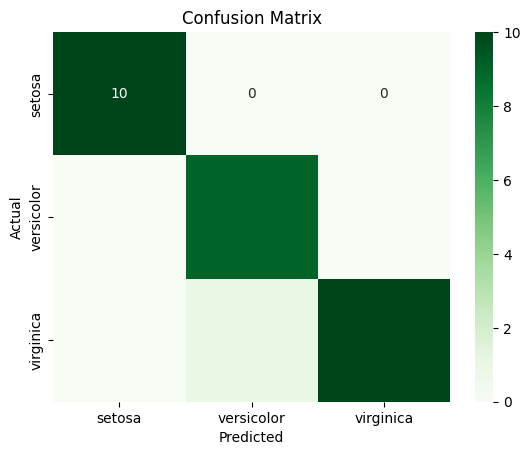

In [47]:
# Confusion Matrix
cm = confusion_matrix(y_test, predictions)
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens',
            xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()